In [158]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

We are going to look at a dataset that contains production indices (PIN) of countries and continents that is gathered by the UN under the Food and Agriculture Organization (FAO).  The data contains production can be directly associated with how a country is doing on the world stage.  It contains Production Index Numbers which is based on the Geary-Khamis formula.  This formula is a standard used to compare countries to a purchasing power parity and GDP.  All numbers are based on USD 1999-2001.  

This data comes from the kaggle https://www.kaggle.com/unitednations/global-food-agriculture-statistics, its is originally pulled from the UNData.  I am focusing mainly on the FAO (Food and Agriculture Organization) production indices numbers(PIN) dataset.  I am looking to see if the value of agricultural goods have a consistent increase over time by continent and country.

The data I am going to focus on are in the columns of country_or_area, element_code, element, year, value, and category.

The country_or_area contains the continents as well, which will give a good starting point to look at different areas of the world.  The value contains the PIN of that category and country.

We are going to use element_code to extract out the Grs per capita PIN(base 1999-2001).  This will look at the Gross per capia PIN between the diffent areas of the world and countries.

The categories are agricultural PIN, crops PIN, food PIN, livestock PIN, and non food PIN.  I am just going to concentrate on the agricultural PIN.

[Text(0, 0.5, 'Gross per capita PIN (base 1999-2001) in int. $ in int. $'),
 Text(0.5, 0, 'Year')]

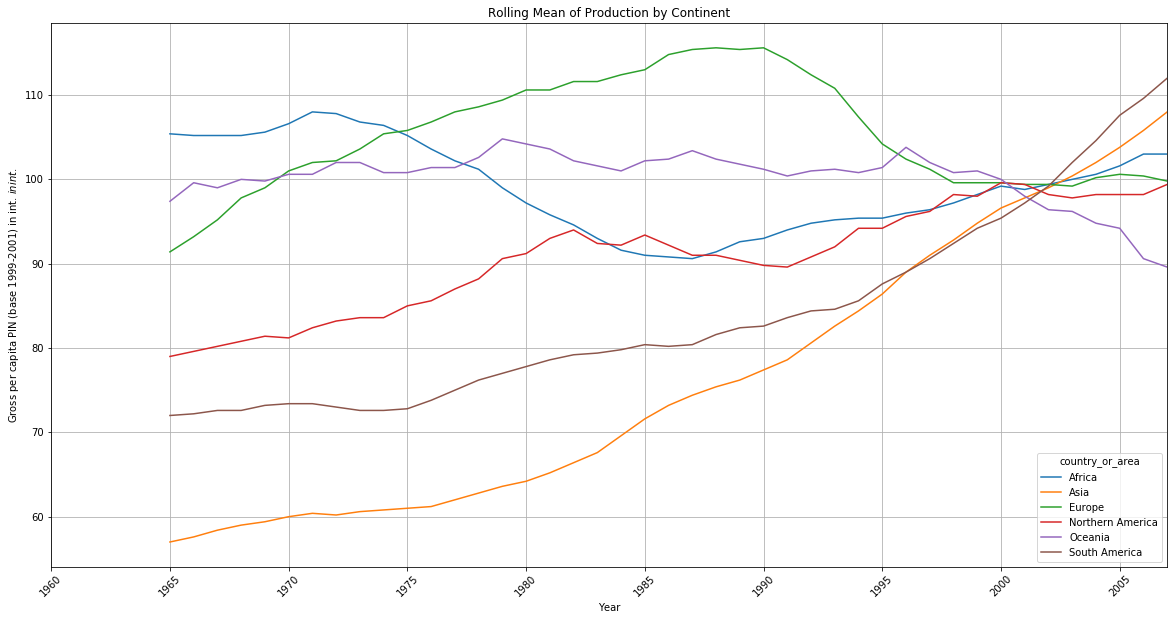

In [157]:
##prod_indic = 'global-food-agriculture-statistics/fao_data_production_indices_data.csv'
df = pd.read_csv('fao_data_production_indices_data.csv')

# Sorting the values by country and year for clarity
df = df.sort_values(by=['country_or_area', 'year'])

# Removing the space and plus from the continent regions that are present in the dataset
df['country_or_area'] = df['country_or_area'].str.rstrip(' +')

# Setting a variables for continents, data contains different regions along with the continents and the plot name to input into the plot function
continents = {'Northern America', 'South America', 'Africa', 'Europe', 'Asia', 'Oceania'}
production = 'Rolling Mean of Production by Continent'

# Creating a function for repeated plot generating
def extract_data(value_names):
    # Selecting data based on the continents and the agriculture PIN category
    data = df[df['element_code'].isin(['434']) & df['country_or_area'].isin(value_names) & df['category'].isin(['agriculture_pin'])]
    return data

def make_plot(data, plot_name):
    # Putting the data into a figure, and cleaning up the legend
    return px.line(data, x='year', y='value', color='country_or_area', hover_name='country_or_area', hover_data=['year', 'value'], title=plot_name).for_each_trace(lambda t: t.update(name=t.name.replace('country_or_area=','')))

# Extracting data to just for the continents
world = extract_data(continents)

# Pivoting data for format of only relevent information
world_pivot = world.pivot(index='year', columns='country_or_area', values='value')

# Ploting out a rolling mean over 5 years to see any trends
world_pivot.rolling(5).mean().plot(xticks=np.arange(min(world_pivot.index)-1, max(world_pivot.index), 5.0), rot=45, figsize=(20,10), title=production, grid=True).set(xlabel='Year', ylabel='Gross per capita PIN (base 1999-2001) in int. $ in int. $')

By looking at a rolling mean of 5 years, we can see that Asia has had a significate increase in Gross per capita PIN.

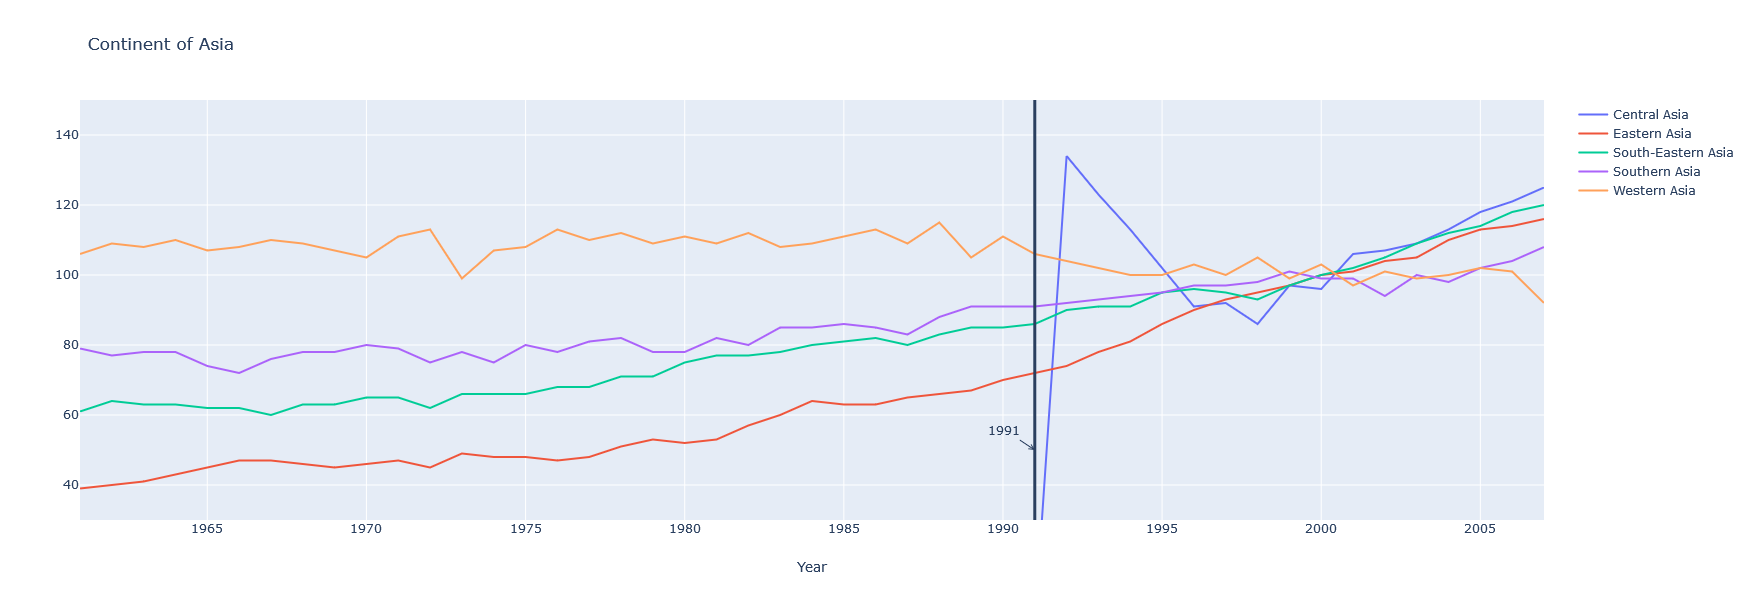

In [126]:
# Selecting only the countries on the continent of Asia
asia_areas = {'South-Eastern Asia', 'Eastern Asia', 'Central Asia', 'Southern Asia', 'Western Asia'}
asia_name = 'Continent of Asia'

# Generating the plot
fig = px.line(extract_data(asia_areas), x='year', y='value', color='country_or_area', hover_name='country_or_area', hover_data=['year', 'value'], title=asia_name).for_each_trace(lambda t: t.update(name=t.name.replace('country_or_area=','')))

# Updating the x and y axis titles to reflect the data
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Gross per capita PIN (base 1999-2001) in int. $ in int. $')
fig.update_yaxes(range=[30, 150])

# Adding a line and annotation to the year 1991 to represent the collapse of the USSR
fig.add_shape(go.layout.Shape(type="line", x0=1991, y0=0, x1=1991, y1=150, line=dict(width=3)))
fig.update_layout(annotations=[go.layout.Annotation(x=1991, y=50, text='1991', showarrow=True, arrowhead=5, ax=-30, ay=-20)])

fig.show()

Here we can see where the U.S.S.R collapsed and the FAO data from the UN start to seperate out into Central Asia in 1992.  Lets now zoom down into Eastern Asia and see whats going on there.

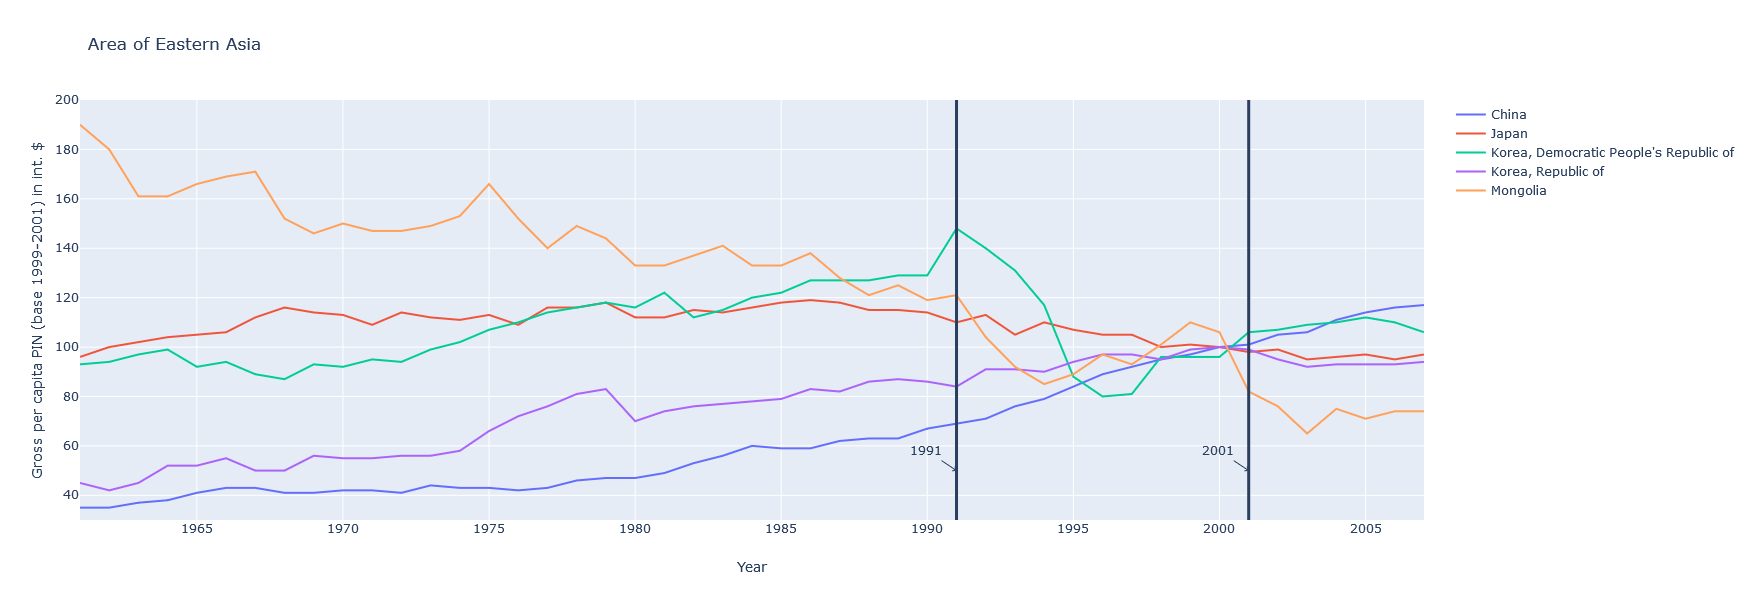

In [134]:
# Selecting only the countries on the continent of Asia
eastern_asia = {'China', 'Japan', 'Korea, Republic of', 'Korea, Democratic People\'s Republic of', 'Mongolia'}
eastern_name = 'Area of Eastern Asia'

# Creating value to use acrost multiple chart types
eastern_asia_data = extract_data(eastern_asia)

# Generating the plot
fig = px.line(eastern_asia_data, x='year', y='value', color='country_or_area', hover_name='country_or_area', hover_data=['year', 'value'], title=eastern_name).for_each_trace(lambda t: t.update(name=t.name.replace('country_or_area=','')))

# Updating the x and y axis titles to reflect the data
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Gross per capita PIN (base 1999-2001) in int. $')
fig.update_yaxes(range=[30, 200])

# Adding a line and annotation to the year 1991 to represent the collapse of the USSR
fig.add_shape(go.layout.Shape(type="line", x0=1991, y0=0, x1=1991, y1=300, line=dict(width=3)))
fig.add_annotation(go.layout.Annotation(x=1991, y=50, text='1991'))

# Adding a line and annotation to the year 2001 to represent the tech stock collapse
fig.add_shape(go.layout.Shape(type="line", x0=2001, y0=0, x1=2001, y1=300, line=dict(width=3)))
fig.add_annotation(go.layout.Annotation(x=2001, y=50, text='2001'))
fig.update_annotations(dict(xref='x', yref="y", showarrow=True, arrowhead=4, ax=-30, ay=-20))
fig.show()

You can also see here you can see how the collapse of the U.S.S.R. had an effect on Mongolia and the Democratic people's Republic of Korea (DPRK).  It looks like Mongolia was starting to have a strong recovery until the collapse of the tech industry in the year 2001, but it does not look like the DPRK has the same issue during the 2001 time period.

China and the Republic of Korea look to be making up for the difference in the areas production due all the other countries decrease in Gross per capita PIN.

Throw in a line for 1991 to annotated the collapse of the USSR

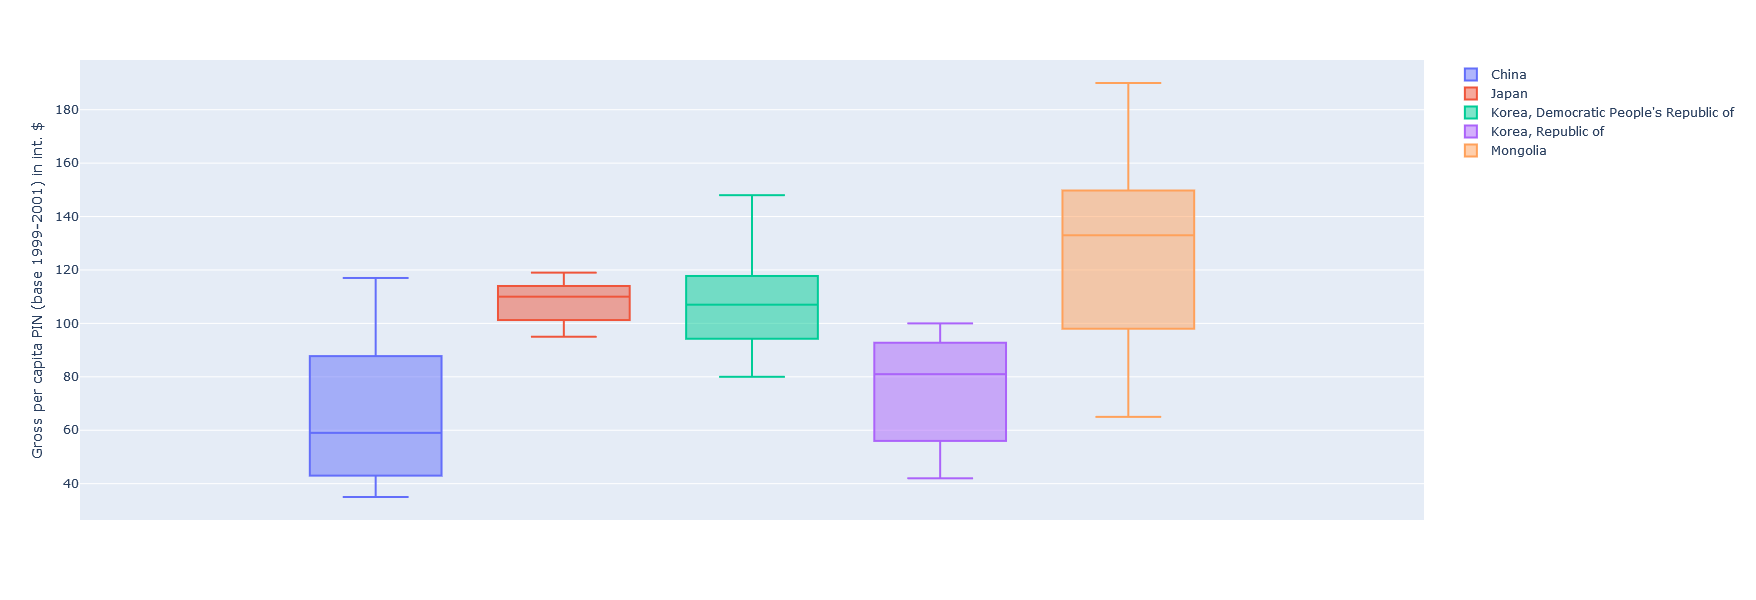

In [135]:
fig = px.box(eastern_asia_data, y='value', color='country_or_area').for_each_trace(lambda t: t.update(name=t.name.replace('country_or_area=','')))
fig.update_yaxes(title_text='Gross per capita PIN (base 1999-2001) in int. $')
fig.show()

Here we can see just how much Mongolia and DPRK has changed with a decrease in their PIN, and how China has increased their PIN.  It is hard to tell in 

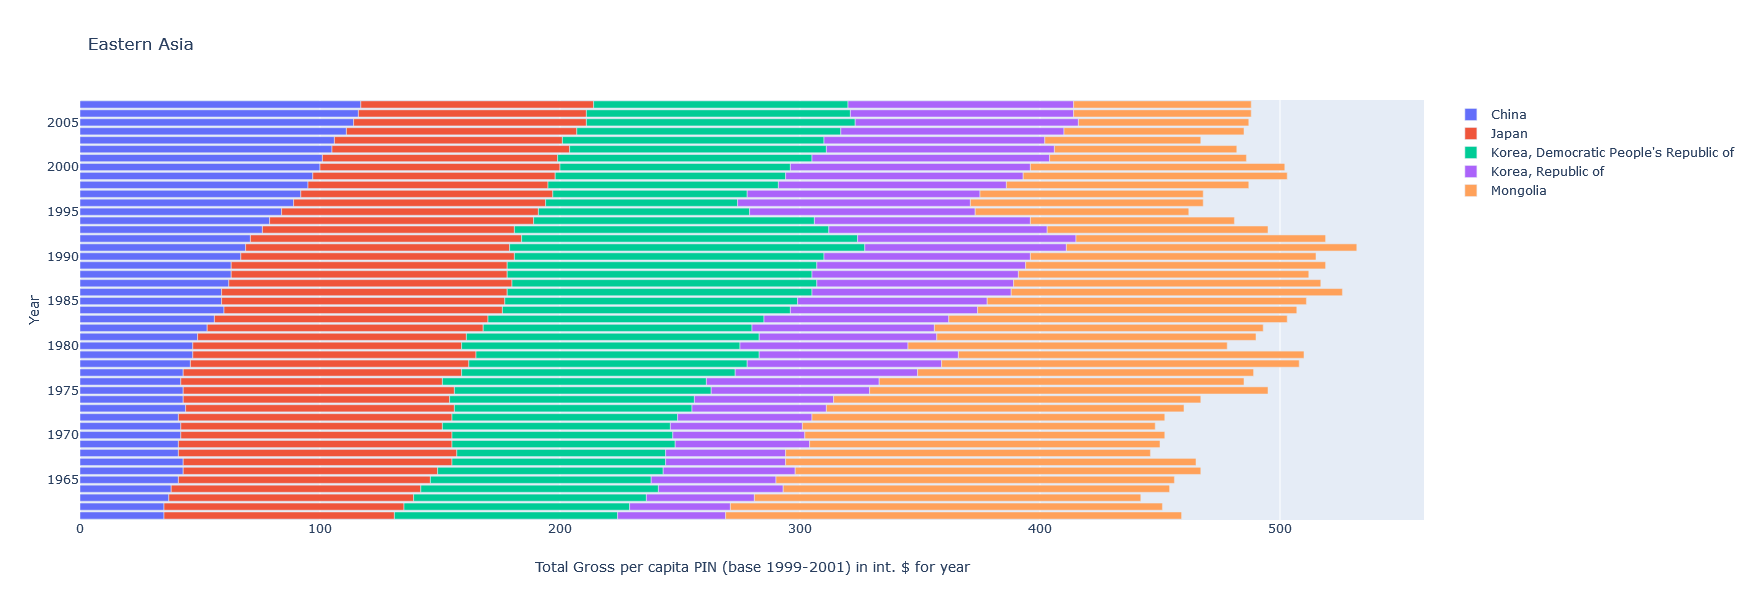

In [10]:
#fig = px.bar(eastern_asia_category, x='value', y='year', orientation='h')
fig = px.bar(eastern_asia_data, x='value', y='year', color='country_or_area', orientation='h', hover_data=['year', 'value'], title='Eastern Asia').for_each_trace(lambda t: t.update(name=t.name.replace('country_or_area=','')))
fig.update_xaxes(title_text='Total Gross per capita PIN (base 1999-2001) in int. $ for year')
fig.update_yaxes(title_text='Year')
fig.show()

You can see how the total production for the area is similar, but which country is producing the most is changing.

I would be good to compair this data directly with populations of each area.  And to take a look at how which countries production is tied directly to major historical events and which ones were able to be unaffected by those same events.  This could be done by using matching population data and historical markers.